## Instrucciones de instalación  especiales para esta práctica
Para visualizar los árboles se necesita la libreria `graphviz`. De forma opcional (pero muy recomendada), se recomienda la instalación de la librería: `XGBoost`.

Al entrar en miniconda y una vez dentro del entorno AB (`activate AB`), se instala las mencionadas librerías anteriores mediante las instrucciones (por separado):

`conda install python-graphviz`

`conda install -c conda-forge xgboost`


----

In [2]:
# Cargando modulos
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
# from sklearn.externals.six import StringIO 
import graphviz 

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, r2_score

from xgboost import XGBClassifier, XGBRegressor
from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings('ignore')

# Para ser reproducible
np.random.seed(42)

%matplotlib inline


#### Función especial para crear y visualizar los árboles usando `pydot`

In [5]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = export_graphviz(estimator, out_file=None, feature_names=features, class_names=classn, filled=filled)
    graph = graphviz.Source(dot_data)
    return(graph)

## Árboles de regresión

In [38]:
# Importando el dataset hitters.csv
df = pd.read_csv("/content/Champions.csv").dropna()
df.info()
df["winrate"] = np.round(df["winrate"])
y = df["winrate"] # Logaritmo del salario
df = df.drop(columns=["name", "tag1", "tag2", "key","winrate"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 157
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   119 non-null    int64  
 1   name                  119 non-null    object 
 2   hp                    119 non-null    float64
 3   hpperlevel            119 non-null    int64  
 4   mp                    119 non-null    float64
 5   mpperlevel            119 non-null    float64
 6   movespeed             119 non-null    int64  
 7   armor                 119 non-null    int64  
 8   armorperlevel         119 non-null    float64
 9   spellblock            119 non-null    float64
 10  spellblockperlevel    119 non-null    float64
 11  attackrange           119 non-null    int64  
 12  hpregen               119 non-null    float64
 13  hpregenperlevel       119 non-null    float64
 14  mpregen               119 non-null    float64
 15  mpregenperlevel       1

In [39]:
df.head()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,playrate
0,650.0,104,0.0,0.0,345,38,4.45,32.0,2.05,175,...,1.00,0.00,0.00,0,0,60.0,5.0,2.50,0.651,0.097
2,646.0,99,339.0,52.0,340,35,5.00,32.1,2.05,125,...,0.80,8.15,0.75,0,0,68.0,3.5,2.50,0.644,0.076
3,652.0,114,263.0,57.5,340,39,5.20,32.0,2.05,175,...,0.95,6.60,0.35,0,0,64.0,5.0,1.00,0.625,0.087
4,640.0,109,375.0,25.0,345,31,4.30,32.0,2.05,150,...,0.85,8.00,0.80,0,0,57.0,3.0,2.25,0.625,0.132
5,653.0,103,0.0,0.0,345,32,4.20,32.0,2.05,125,...,0.75,0.00,0.00,0,0,61.0,3.5,3.30,0.720,0.019


Se define los descriptores `X` y la variable de salida `y`. También, se grafica la distribución del salario, y su transformación logaritmica:

In [40]:

X = df # Solo numeros en un array de Numpy


Se instancia el objeto (estimador predictor) con 3 como máximo número de hojas, y luego se ajusta:

In [41]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

In [42]:
# R^2 del training
regr.score(X,y)

0.18016106153861244

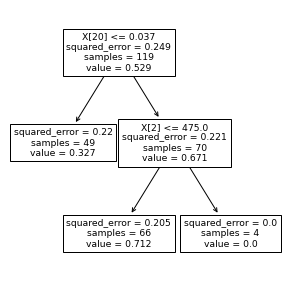

In [43]:
#Metodo plot_tree
plt.figure(figsize=(5,5))
plot_tree(regr);

In [44]:
#Método graphviz
# Se visualiza usando la funcion creada al inicio "print_tree"
graph = print_tree(regr, features=['Years', 'Hits'])
graph

ValueError: ignored

Gráfica (manual) de las regiones

In [ ]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25); plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24]), plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250), plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

## Árboles de clasificación

In [ ]:
# Importando el dataset heart.csv
df2 = pd.read_csv('data/heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

In [45]:
df.head()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,playrate
0,650.0,104,0.0,0.0,345,38,4.45,32.0,2.05,175,...,1.00,0.00,0.00,0,0,60.0,5.0,2.50,0.651,0.097
2,646.0,99,339.0,52.0,340,35,5.00,32.1,2.05,125,...,0.80,8.15,0.75,0,0,68.0,3.5,2.50,0.644,0.076
3,652.0,114,263.0,57.5,340,39,5.20,32.0,2.05,175,...,0.95,6.60,0.35,0,0,64.0,5.0,1.00,0.625,0.087
4,640.0,109,375.0,25.0,345,31,4.30,32.0,2.05,150,...,0.85,8.00,0.80,0,0,57.0,3.0,2.25,0.625,0.132
5,653.0,103,0.0,0.0,345,32,4.20,32.0,2.05,125,...,0.75,0.00,0.00,0,0,61.0,3.5,3.30,0.720,0.019


In [ ]:
# Se codifican las variables categoricas utilizando
# la funcion "factorize" de Pandas
df2['ChestPain'] = pd.factorize(df2['ChestPain'])[0]
df2['Thal'] = pd.factorize(df2['Thal'])[0]

In [46]:
X2 = df # Solo descriptores
y2 = pd.factorize(y)[0] # Variable de salida codificada

Se instancia el objeto (estimador y predictor) y se ajusta

In [47]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [48]:
#Acuraccy medio para el conjunto entrenado
clf.score(X2,y2)


0.7478991596638656

Visualización del árbol de clasificación

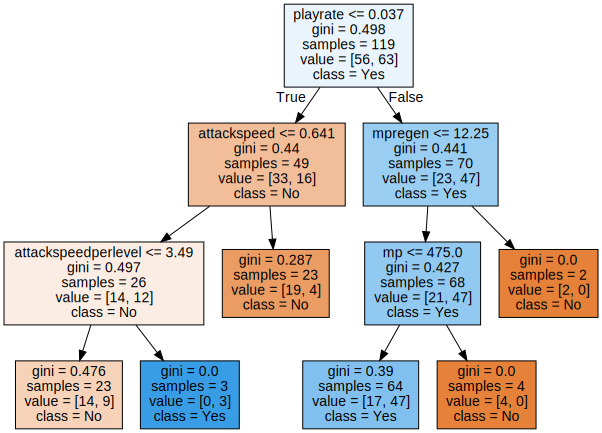

In [49]:
print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])

## Bagging and random forest

### Bagging tree classifier

In [50]:
bag_clf = BaggingClassifier(max_features=3)
bag_clf.fit(X2,y2)
bag_clf.score(X2,y2) # Mean accuracy

0.957983193277311

Ahora se realizará el mismo proceso pero con validación cruzada (tiene mucha mayor validez real)

In [51]:
bag_clf = BaggingClassifier(max_features=3)
cross_val_score(bag_clf, X2,y2, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.5213768115942028

El accuracy medio no es tan excelente, pero es mucho más real (cuidado, en principio, se debe separar un Test set al inicio, que no se ha hecho).

### Bagging tree regressor

In [ ]:
bag_reg = BaggingRegressor()
bag_reg.fit(X,y)
bag_reg.score(X,y) # R^2

In [ ]:
cross_val_score(BaggingRegressor(),X,y,cv=5,verbose=1).mean()

¡Qué diferencia! el R^2 no es tan bueno, esto quiere decir que sin hacer validación cruzada hay un sobreajuste grande.

### Random forest classifier

In [52]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X2,y2)
RF_clf.score(X2,y2)

1.0

In [53]:
cross_val_score(RandomForestClassifier(random_state=42),X2,y2,cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


0.5043478260869565

### Random forest regressor

In [54]:
RF_reg = RandomForestRegressor(random_state=42)
RF_reg.fit(X,y)
RF_reg.score(X,y)

0.8491013888888889

In [55]:
RF_reg.feature_importances_

array([0.093275  , 0.04994788, 0.07571917, 0.04868999, 0.03412328,
       0.03476383, 0.05139611, 0.01405146, 0.00482597, 0.01934173,
       0.06128809, 0.02864439, 0.05269943, 0.02799968, 0.        ,
       0.        , 0.04995275, 0.06807256, 0.05416219, 0.04960441,
       0.18144209])

In [57]:
model_rf = RandomForestRegressor(random_state=42)
cross_val_score(model_rf,X, y, cv=50, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.3s finished


-0.18981599999999996

## Boosting
### Gradient boosting classifier

In [ ]:
GBC_clf = GradientBoostingClassifier(learning_rate=0.1)
GBC_clf.fit(X2,y2)
GBC_clf.score(X2,y2)

In [ ]:
GBC_clf.feature_importances_

In [ ]:
cross_val_score(GradientBoostingClassifier(learning_rate=0.1)
, X2,y2, cv=5, verbose=1).mean()

Ha mejorado el accuracy

### Gradient boosting regressor

In [ ]:
GBR_reg = GradientBoostingRegressor(learning_rate=0.1)
GBR_reg.fit(X,y)
GBR_reg.score(X,y)

In [ ]:
GBR_reg = GradientBoostingRegressor(learning_rate=0.1)
cross_val_score(GBR_reg, X, y, cv=10, verbose=1).mean()

## Variable importance

In [ ]:
# Crea una Series de Panda con el atributo de features_importances_
# y adhiere los nombres de las features como indice
best_features = pd.Series(GBC_clf.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False) # Ordena los valores de forma descendente

In [ ]:
best_features.plot(kind='bar')

## XGBoost
`XGBoost` es una librería que funciona de forma independiente a scikit-learn, pero que se puede integrar fácilmente a su API, mediante los estimadores `XGBClassifier` y `XGBRegressor`. 
A continuación se muestra ejemplos con los dos datasets trabajados anteriormente.

In [ ]:
# from xgboost import XGBClassifier

xgb_cl = XGBClassifier(learning_rate=0.1, max_depth=2)

# Validacion cruzada de 5 folds, mide el Accuracy y se ha colocado
# verbose=1 para mostrar informacion sobre el proceso.
cross_val_score(xgb_cl,X2,y2,cv=5,verbose=1).mean()

El mejor accuracy! y el tiempo de ejecución es pequeño

In [ ]:
xgb_cl.fit(X2,y2)
xgb_cl.score(X2,y2)

In [ ]:
best_features = pd.Series(xgb_cl.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False)

In [ ]:
best_features.plot(kind='bar')

## XGBoost: Buscando los mejores hiperparámetros

### Ejemplo de `XGBRegressor` con tuneo de algunos hiperparámetros

In [ ]:
# from xgboost import XGBRegressor()
xgb_reg = XGBRegressor()
clf = GridSearchCV( xgb_reg,
                  {'max_depth':range(2,12,2), # produndidades de 2 hasta 10 con incrementos de 2
                   'n_estimators': range(25,201,25),
                  'learning_rate':np.arange(0.1,0.15,0.01)},
                   cv = 5, n_jobs=-1,verbose=1)
clf.fit(X,y)

En mi equipo, gasta un tiempo de 3.3s con un total de 1000 ajustes! Es muy muy rápida esta libreria!

In [ ]:
print(clf.best_score_) # Los mejores hiperparametros
print(clf.best_params_) # r2_score de la validacion cruzada

Es el mejor resultado tiene un R^2 de 0.66 obtenidos con árboles con 2 de profundidad máxima, máximo 50 árboles y una tasa de aprendizaje de 0.14.

### Ejemplo de `XGBClassifier` con tuneo de algunos hiperparámetros
Este ejemplo tiene la mismam configuración del ejemplo con regresión.

In [ ]:
xgb_cl = XGBClassifier()
clf = GridSearchCV( xgb_cl,
                  {'max_depth':range(2,12,2), # profundidades de 2 hasta 10 con incrementos de 2
                   'n_estimators': range(25,201,25),
                  'learning_rate':np.arange(0.1,0.15,0.01)},
                   cv = 5, n_jobs=-1,verbose=1)
clf.fit(X2,y2)

In [ ]:
print(clf.best_score_) # Los mejores hiperparametros
print(clf.best_params_) # r2_score de la validacion cruzada

In [ ]:
best_features = pd.Series(clf.best_estimator_.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False)

In [ ]:
# Una configuracion mas variada para GridSearch:
# param_grid = {
#         'silent': [False],
#         'max_depth': [6, 10, 15, 20],
#         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
#         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
#         'gamma': [0, 0.25, 0.5, 1.0],
#         'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
#         'n_estimators': [25,50,75,100,125,150]}


### Ahora un ejemplo usando `RandomizedSearchCV`
Esta clase permite hacer una búsqueda aleatoria de un número determinado de combinaciones aleatorias para unos parámetros definidos ya sean por una lista de valores o una distribución específica.

In [ ]:
# from sklearn.modecl_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

xgb_cl = XGBClassifier()
param_grid = {"max_depth": randint(2,5),
              "learning_rate": uniform(0.001,0.4), 
              "n_estimators": randint(25,200)}

# Se probaran 200 combinaciones de los parametros definidos en param_dist
# en cada validacion cruzada, es decir, 1000 iteraciones
clf = RandomizedSearchCV(xgb_cl, param_grid, n_iter=400, cv=5, n_jobs=-1,verbose=1, random_state=42)

clf.fit(X2,y2)


In [ ]:
print(clf.best_score_) # Los mejores hiperparametros
print(clf.best_params_) # accuracy medio de la validacion cruzada

**El mejor accuracy en validación cruzada!**

In [ ]:
best_features = pd.Series(clf.best_estimator_.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False)

# Ejercicios

[1]. Para el dataset de `heart.csv` realice lo siguiente:

* Realice una división entre training y test sets.
* Ajuste un modelo de clasificación con árboles de decisión, Random forest, Bagging trees, y Gradient boosting trees usando validación cruzada para el training set y evalue los resultados con el test set. ¿Cúal es el mejor?
* Utilice la importancia de las variables del mejor modelo anterior para hacer una selección de variables, luego proceda a ajustar un nuevo modelo con el mejor clasificador usando validación cruzada y probando sobre el Test set.
* Utilice las herramientas necesarias (pipeline, GridSearchCV) para encontrar la mejor tasa de aprendizaje, la profundidad máxima y el número de árboles,  del modelo Gradient Boosting Trees (recomendable usar XGBBoost).
* Intente crear el mejor modelo posible ajustando más hiperparámetros del modelo con mejor resultado en las pruebas anteriores.

[2] Repita todos los pasos anteriores para la regresión usando el dataset `hitters.csv`